In [1]:
!pip install tweepy==4.10.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 939 kB/s 
     |████████████████████████████████| 62 kB 460 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [2]:
!pip show tweepy

Name: tweepy
Version: 4.10.1
Summary: Twitter library for Python
Home-page: https://www.tweepy.org/
Author: Joshua Roesslein
Author-email: tweepy@googlegroups.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: requests, requests-oauthlib, oauthlib
Required-by: 


In [3]:
import os
import tweepy as twep
import pandas as pd

In [4]:
#keys to access the twitter API
consumer_key= 'Y3RJeJFRHnA9QnpZu8z9S0Skb'
consumer_secret= 'mSHz1KdYkTNmYWuxMwX4fMzzGc9qv1OqgyQxWU26pheoGRcLuE'
access_token= '1287803472805367808-EedGVpYxgeXKILni2gt9HvJacgsmxx'
access_token_secret= 'K9jXNXr6i72odGz9XAiUnN5841eIUiDKcrj52RozRO743'

In [5]:
#Code to access the api and authentication to connect to twitter API
auth = twep.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = twep.API(auth, wait_on_rate_limit=True)

In [6]:
#code to search the Tweets with keyword tesla and add them to a text file
keyword = 'Tesla'
limit=1000
tweets = twep.Cursor(api.search_tweets, q=keyword, tweet_mode='extended').items(limit)
file = open('twitter.txt', 'w', encoding="utf-8")
for tweet in tweets:
    file.write(tweet.full_text+'\n')
file.close()

In [7]:
#code to search the Tweets with keyword #TSLA and add them to a text file
keyword = '#TSLA'
limit=1000
tweets = twep.Cursor(api.search_tweets, q=keyword, tweet_mode='extended').items(limit)
file = open('twitter.txt', 'a', encoding="utf-8")
for tweet in tweets:
    file.write(tweet.full_text+'\n')
file.close()

In [8]:
#code to search the Tweets with keyword yahoofinance and Tesla and add them to a text file
keyword = 'yahoofinance and Tesla'
limit=1000
tweets = twep.Cursor(api.search_tweets, q=keyword, tweet_mode='extended').items(limit)
file = open('twitter.txt', 'a', encoding="utf-8")
for tweet in tweets:
    file.write(tweet.full_text+'\n')
file.close()

In [9]:
#opening file to write the processed text
file = open('processed.txt', 'w', encoding="utf-8")

In [10]:
#preprocessing
import re
with open('twitter.txt','r', encoding="utf-8") as f:
    lines = f.readlines()
f.close()
for line in lines:
    content=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", line).split())
    file.write(content+'.'+'\n')
file.close()

In [11]:
#Converting the input file into the list of sentences. 
Input = open("processed.txt", "r")
data = Input.read()
data_to_list = data.split("\n")
Input.close()

In [12]:
#Adding the input text that needs to be classified to the TEST variable
Test_X=[]
for x in data_to_list:
    Test_X.append(x)
Test_X

['RT Who wants my old Tesla model s This tesla giveaway ends in 7 days To enter follow the steps below.',
 '.',
 'Follow Comme.',
 'When the Giga Shanghai plant is blocked by the Chinese Communist Party is silent.',
 'And here in California it was worth blocking his plant a little then he yelled and shouted to the whole world.',
 'RT Map of Tesla charging stations 1437 AD.',
 'RT News Tesla Quebec LG and others work on new battery passport.',
 'RT A man and his son are in a car accident The man is killed instantly His son is rushed to the hospital The surgeon says.',
 'RT Fascinated by this one which starts off with a blow by blow of a crash 100 percent caused by bad Tesla automation and then.',
 'Imagine a Tesla phone with built in starlink connectivity.',
 'Tesla Smartphone.',
 'RT BBC Ed Lawrence.',
 'Tesla Because that premium gas will add up versus the charge of a car but do what makes you happy.',
 'RT Seems like a good time to remind folks how many great EV s are out there that 

In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
#removing the stopwords and peroforming the lemmatization and appending back.
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
Test_data=[]
for x in Test_X:
    tokens = word_tokenize(str(x))
    final_tokens = [w for w in tokens if w not in stopword]
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
        if len(w)>1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    Test_data.append(' '.join(finalwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
#Removing duplicate and single word sentences.
Test_X=[]
for x in Test_data:
    if len(x)>10:
        Test_X.append(x)
Test_X = [*set(Test_X)]

In the below 2 cells\, read the input from 2 different sets that are related to the stock sentiment to train the model.

In [16]:
twit = pd.read_csv("/content/all-data.csv", encoding = "latin-1")
Train_Y=twit["Sentiment"]
Train_X=twit["Text"]

In [17]:
twit = pd.read_csv("/content/stock_data.csv", encoding = "latin-1")
for ind in twit.index:
    if(twit['Sentiment'][ind]==-1):
        twit['Sentiment'][ind]="negative"
    else:
        twit['Sentiment'][ind]="positive"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
Train_X=Train_X.append(twit["Text"])
Train_Y=Train_Y.append(twit["Sentiment"])

In [19]:
Train_X.shape

(10637,)

In [20]:
#cleaned the train data by removing the stop words and doing the lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
Train_data=[]
for x in Train_X:
    tokens = word_tokenize(str(x))
    final_tokens = [w for w in tokens if w not in stopword]
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
        if len(w)>1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    Train_data.append(' '.join(finalwords))
Train_X= Train_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#converted the list to Pandas data frame for analysis
df = pd.DataFrame(list(zip(Train_X, Train_Y)),
               columns =['Text', 'Sentiment'])

In [22]:
#created the wordcloud method to display the words with the sentiment values
from wordcloud import WordCloud 
from matplotlib import pyplot as plt

def DisplayWordCloud(input,bcol):
    plt.figure(figsize=(10,10))
    wocl=WordCloud(background_color=bcol,max_words=50, min_word_length=2, contour_width=1, contour_color='orange')
    wocl.generate(" ".join(input)) 
    plt.imshow(wocl)
    plt.axis("off")

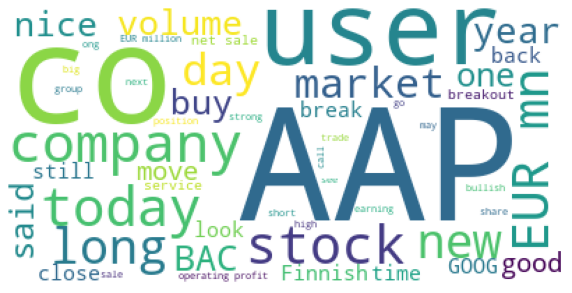

In [23]:
DisplayWordCloud(df[df.Sentiment=="positive"].Text, 'white')

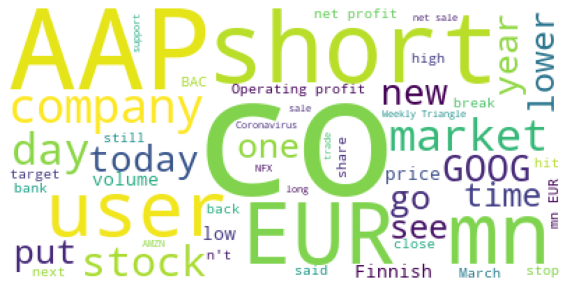

In [24]:
DisplayWordCloud(df[df.Sentiment=="negative"].Text, 'white')

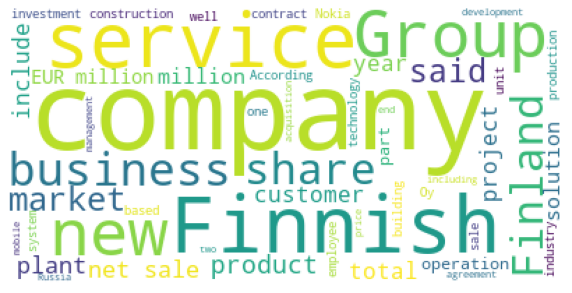

In [25]:
DisplayWordCloud(df[df.Sentiment=="neutral"].Text, 'white')

In [26]:
#creating a pipeline withe Tf-IDF vector and multinomailNaive bayes classifier as we have positive, negative and Neutral sentiment.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [27]:
#model is trained using FIt method
model.fit(Train_X, Train_Y)
labels = model.predict(Test_X)

In [28]:
#lables for the input are counted based on the sentiment
Final_lables=labels.tolist()
pcount=Final_lables.count("positive")
ncount=Final_lables.count("negative")
necount=Final_lables.count("neutral")
pcount,ncount,necount

(1359, 50, 52)

Building a sentiment model to pass the above labelled twitter data to predict the sentiment of the tweets and then deciding the stock direction where it is bearish or bullish based on the predicted tweets. Also comparing the above labels with the predicted sentiment in the below model gives the accuracy of the model.

In [29]:
import nltk
import numpy as np
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier 
from nltk.corpus import twitter_samples 
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
import pandas as pd

In [30]:
#nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
df = pd.read_csv("stock_twitter.csv",encoding='latin-1',sep=',')

In [32]:
df.head(2)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,positive
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,positive


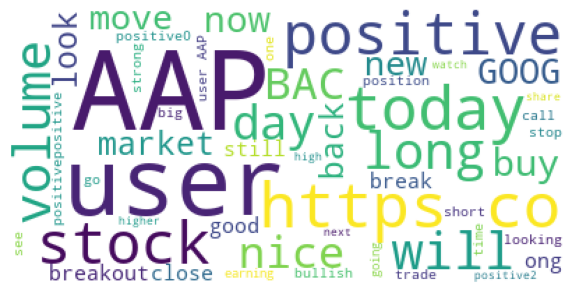

In [33]:
DisplayWordCloud(df[df.Sentiment=="positive"].Text, 'white')

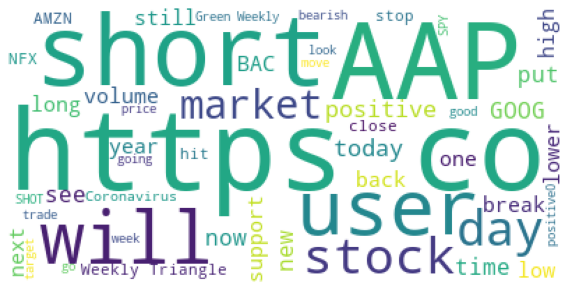

In [34]:
DisplayWordCloud(df[df.Sentiment=="negative"].Text, 'white')

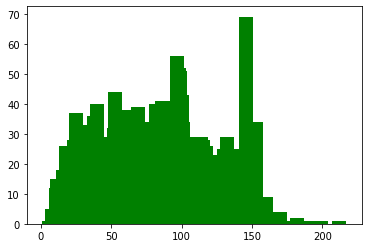

In [35]:
positive_tweets = df.loc[df['Sentiment']=='positive']
positive_tweets['Text']
#frequency of length of sentences in the positive text of dataset
from collections import OrderedDict
freq = {}
for line in positive_tweets['Text']:
  l=len(line)
  if (l in freq):
    freq[l] += 1
  else:
    freq[l] = 1
final_dict = OrderedDict(sorted(freq.items()))
plt.bar(final_dict.keys(), final_dict.values(), 10, color='g')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


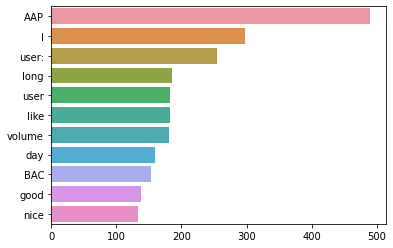

In [36]:
from scipy.stats.morestats import special
#most common words in the positive dataset text
from collections import Counter
import nltk
import seaborn as sns

nltk.download('stopwords')
stop=set(stopwords.words('english'))
Input_str=[]
for line in positive_tweets['Text']:
    word_list= line.split()
    for word in word_list:
      Input_str.append(word)
count=Counter(Input_str)
common=count.most_common()
x, y= [], []
symbols = {'~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/'}
for word,count in common[:40]:
    if (word not in stop):
      if(word not in symbols):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

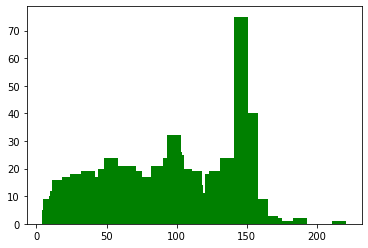

In [37]:
negative_tweets = df.loc[df['Sentiment']=='negative']
negative_tweets['Text']
#frequency of length of sentences in the negative text of dataset
from collections import OrderedDict
freq = {}
for line in negative_tweets['Text']:
  l=len(line)
  if (l in freq):
    freq[l] += 1
  else:
    freq[l] = 1
final_dict = OrderedDict(sorted(freq.items()))
plt.bar(final_dict.keys(), final_dict.values(), 10, color='g')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


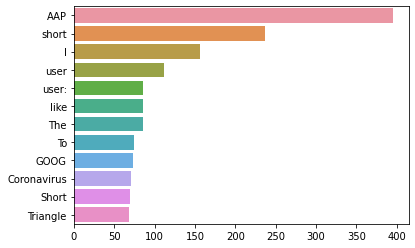

In [38]:
from scipy.stats.morestats import special
#most common words in the negative dataset text
from collections import Counter
import nltk
import seaborn as sns

nltk.download('stopwords')
stop=set(stopwords.words('english'))
Input_str=[]
for line in negative_tweets['Text']:
    word_list= line.split()
    for word in word_list:
      Input_str.append(word)
count=Counter(Input_str)
common=count.most_common()
x, y= [], []
symbols = {'~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/'}
for word,count in common[:40]:
    if (word not in stop):
      if(word not in symbols):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [39]:
#cleaning the dataset
import re
import string
import numpy as np

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

def process_tweet(tweet):
  
  # remove the hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

  # remove the # symbol
  tweet = re.sub(r'#', '', tweet)

  tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tweet_tokens = tokenizer.tokenize(tweet)
  tweet_clean = []

  return tweet_tokens

In [40]:
#counting the frequency
def count_tweets(tweets, s):
  tweet_list = np.squeeze(s).tolist()
  frequency ={}

  for y, tweet in zip(tweet_list, tweets):
    for word in process_tweet(tweet):
      pair = (word, y)
      if pair in frequency:
        frequency[pair] +=1
      else:
        frequency[pair] = 1
  
  return frequency

In [41]:
def lookup(frequency, word, label):
  n = 0
  pair = (word, label)
  if pair in frequency:
    n = frequency[pair]
  return n 

In [42]:
# splitting the data for training and testing 
training_pos = positive_tweets.sample(frac=0.8, random_state=25)
testing_pos = positive_tweets.drop(training_pos.index)

training_neg = negative_tweets.sample(frac=0.8, random_state=25)
testing_neg = negative_tweets.drop(training_neg.index)

train_x = training_pos.append(training_neg)
test_x = testing_pos.append(testing_neg)

# numpy array for the labels in the training set
train_y = np.append(np.ones((len(training_pos))), np.zeros((len(training_neg))))
test_y = np.append(np.ones((len(testing_neg))), np.zeros((len(testing_neg))))

In [43]:
# Build a frequency dictionary
frequency = count_tweets(train_x["Text"], train_y)

def train_naive_bayes(frequency, train_x, train_y):
  logliklihood = {}
  logprior = 0

  vocab = set([pair[0] for pair in frequency.keys()])
  V = len(vocab)


  N_pos = N_neg = V_pos = V_neg = 0
  for pair in frequency.keys():
    if pair[1]>0:
      V_pos +=1
      N_pos += frequency[pair]
    else:
      V_neg +=1
      N_neg += frequency[pair]

  # Number of Documents (tweets)
  D = len(train_y)

  # D_pos, number of positive documnets
  D_pos = len(list(filter(lambda x: x>0, train_y)))

  # D_pos, number of negative documnets
  D_neg = len(list(filter(lambda x: x<=0, train_y)))

  # calculate the logprior
  logprior = np.log(D_pos) - np.log(D_neg)

  for word in vocab:
    freqs_pos = lookup(frequency, word, 1)
    freqs_neg = lookup(frequency, word, 0)

    # calculte the probability of each word being positive and negative
    p_w_pos = (freqs_pos+1)/(N_pos+V)
    p_w_neg = (freqs_neg+1)/(N_neg+V)

    logliklihood[word] = np.log(p_w_pos/p_w_neg)
  
  return logprior, logliklihood

In [44]:
logprior, loglikelihood = train_naive_bayes(frequency, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.5593614105227651
9256


In [45]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
  word_l = process_tweet(tweet)
  p = 0
  p+=logprior

  for word in word_l:
    if word in loglikelihood:
      p+=loglikelihood[word]

  return p

Accuracy of model:51.029098651525906 %


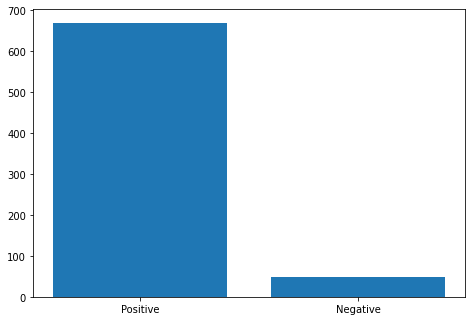

In [46]:
tweets=Test_X
po=0
n=0
Final_lables=labels.tolist()
pcount=Final_lables.count("positive")
ncount=Final_lables.count("negative")
for tweet,label  in zip(tweets,labels):
  p=naive_bayes_predict(tweet,logprior,loglikelihood)
  if(p>1):
    if(label=="positive"):
      po=po+1
  else:
    if(label=="negative"):
      n=n+1
Accuracy= ((n+po)/(pcount+ncount)) * 100
print("Accuracy of model:"+str(Accuracy)+" %")
#plotted a bar chart for the lables that are predicted for the input.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sentiment = ['Positive', 'Negative']
Count = [po,n]
ax.bar(Sentiment,Count)
plt.show()